# Определение перспективного тарифа для телеком-компании

Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

**Описание тарифов**

Тариф «Смарт»
* 		Ежемесячная плата: 550 рублей
* 		Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
* 		Стоимость услуг сверх тарифного пакета: 1. минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута); 2. сообщение: 3 рубля; 3. 1 Гб интернет-трафика: 200 рублей.

Тариф «Ультра»
* 		Ежемесячная плата: 1950 рублей
* 		Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
* 		Стоимость услуг сверх тарифного пакета: 1. минута разговора: 1 рубль; 2. сообщение: 1 рубль; 3. 1 Гб интернет-трафика: 150 рублей.

*Примечание:*
«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.

## Изучение данных из файла

**Вывод данных**

In [261]:
# Импортируем, обновим необходимые библиотеки и уберем предупреждения:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy import stats as st
pd.set_option('display.float_format', '{:,.2f}'.format)
!pip install -U pandas
import warnings
warnings.simplefilter('ignore')

Defaulting to user installation because normal site-packages is not writeable
Requirement already up-to-date: pandas in /home/jovyan/.local/lib/python3.7/site-packages (1.3.5)


In [262]:
# Посмотрим на данные:
users = pd.read_csv('/datasets/users.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
messages = pd.read_csv('/datasets/messages.csv')
internet = pd.read_csv('/datasets/internet.csv')
calls = pd.read_csv('/datasets/calls.csv')

tables = [users, tariffs, messages, internet, calls]

for i in tables:
    display(i.head(10))
    display(i.info())

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


None

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


None

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,"1,052.81",2018-09-07,1000
2,2,1000_2,"1,197.26",2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


None

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


None

In [263]:
# Проверим столбцы с цифровыми дынными на наличие ошибок:
users['age'].describe()

count   500.00
mean     46.59
std      16.67
min      18.00
25%      32.00
50%      46.00
75%      62.00
max      75.00
Name: age, dtype: float64

In [264]:
users['city'].value_counts()

Москва             99
Санкт-Петербург    39
Новосибирск        16
Казань             14
Омск               14
                   ..
Иваново             1
Архангельск         1
Подольск            1
Нижневартовск       1
Химки               1
Name: city, Length: 76, dtype: int64

In [265]:
users['churn_date'].value_counts()

2018-12-09    2
2018-12-21    2
2018-12-03    2
2018-10-14    2
2018-10-03    2
2018-11-13    1
2018-12-30    1
2018-09-26    1
2018-12-18    1
2018-11-16    1
2018-11-27    1
2018-11-30    1
2018-10-28    1
2018-10-05    1
2018-12-14    1
2018-10-27    1
2018-12-26    1
2018-11-22    1
2018-12-11    1
2018-08-17    1
2018-09-02    1
2018-12-24    1
2018-11-07    1
2018-12-20    1
2018-12-16    1
2018-12-23    1
2018-11-21    1
2018-12-25    1
2018-09-27    1
2018-10-04    1
2018-08-31    1
2018-11-26    1
2018-10-25    1
Name: churn_date, dtype: int64

In [266]:
users['churn_date'].isna().sum()

462

In [267]:
users['tariff'].value_counts()

smart    351
ultra    149
Name: tariff, dtype: int64

In [268]:
messages['message_date'].unique()

array(['2018-06-27', '2018-10-08', '2018-08-04', '2018-06-16',
       '2018-12-05', '2018-06-20', '2018-11-19', '2018-10-29',
       '2018-06-25', '2018-12-18', '2018-05-30', '2018-07-06',
       '2018-08-20', '2018-10-30', '2018-09-14', '2018-08-28',
       '2018-06-29', '2018-07-07', '2018-05-29', '2018-05-28',
       '2018-08-15', '2018-07-29', '2018-12-07', '2018-12-25',
       '2018-10-31', '2018-07-30', '2018-11-05', '2018-12-15',
       '2018-12-04', '2018-06-30', '2018-12-22', '2018-10-02',
       '2018-08-29', '2018-09-09', '2018-07-19', '2018-09-04',
       '2018-07-15', '2018-10-25', '2018-12-08', '2018-06-01',
       '2018-06-12', '2018-12-21', '2018-10-07', '2018-08-30',
       '2018-06-04', '2018-10-01', '2018-06-22', '2018-10-12',
       '2018-10-15', '2018-10-24', '2018-09-20', '2018-08-22',
       '2018-09-17', '2018-08-27', '2018-07-26', '2018-06-05',
       '2018-11-16', '2018-09-06', '2018-11-26', '2018-11-18',
       '2018-09-21', '2018-07-11', '2018-07-16', '2018-

Все данные за 2018 год.

In [269]:
internet['mb_used'].describe()

count   149,396.00
mean        370.19
std         278.30
min           0.00
25%         138.19
50%         348.01
75%         559.55
max       1,724.83
Name: mb_used, dtype: float64

In [270]:
calls['duration'].describe()

count   202,607.00
mean          6.76
std           5.84
min           0.00
25%           1.30
50%           6.00
75%          10.70
max          38.00
Name: duration, dtype: float64

### Вывод

Пропусков в данных нет. Есть ошибки в данных о тарификации тарифов: в тарифах оператора нет бесплатных 15360 и 30720 Mb, есть только 15 и 30 Гб.

## Предобработка данных

### Обработка данных

Необходимо округлить данные следующим образом:
«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. 
* Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
* Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.

Веб-трафик округлим позднее после агрегации данных за месяцы.

In [273]:
# Округлим время разговора - секунды до 1 минуты:
calls['duration_min'] = calls['duration'].apply(math.ceil)

In [274]:
calls.head(10)

,id,call_date,duration,user_id,duration_min
0,1000_0,2018-07-25,0.00,1000,0
1,1000_1,2018-08-17,0.00,1000,0
2,1000_2,2018-06-11,2.85,1000,3
3,1000_3,2018-09-21,13.80,1000,14
4,1000_4,2018-12-15,5.18,1000,6
5,1000_5,2018-11-02,0.00,1000,0
6,1000_6,2018-10-18,0.00,1000,0
7,1000_7,2018-08-22,18.31,1000,19
8,1000_8,2018-09-15,18.44,1000,19
9,1000_9,2018-08-15,0.00,1000,0


Округлили данные в соотвествии с тарификацией оператора Мегалайн.

В данных о тарификации тарифов исправим Мб на Гб.

In [276]:
tariffs['mb_per_month_included'] = tariffs['mb_per_month_included'] /1024
tariffs['mb_per_month_included'] = tariffs['mb_per_month_included'].astype('int')
tariffs.rename(columns={'mb_per_month_included':'gb_per_month_included'}, inplace=True)
tariffs.head()

,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15,500,550,200,3,3,smart
1,1000,30,3000,1950,150,1,1,ultra


### Рассчет показателей

Рассчитаем показатели на каждого пользователя:
* количество сделанных звонков и израсходованных минут разговора по месяцам;
* количество отправленных сообщений по месяцам;
* объем израсходованного интернет-трафика по месяцам;
* помесячную выручку с каждого пользователя (необходимо вычесть бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножить на значение из тарифного плана; прибавить абонентскую плату, соответствующую тарифному плану).

In [277]:
# Изменим тип данных в столбце дата и добавим столбец в данные о месяце звонков, выхода в интернет и тд:
messages['message_date'] = pd.to_datetime(messages['message_date'], format = '%Y-%m-%d')
messages['month'] = messages['message_date'].dt.month

internet['session_date'] = pd.to_datetime(internet['session_date'], format = '%Y-%m-%d')
internet['month'] = internet['session_date'].dt.month

calls['call_date'] = pd.to_datetime(calls['call_date'], format = '%Y-%m-%d')
calls['month'] = calls['call_date'].dt.month

In [278]:
tables = [messages, internet, calls]

for i in tables:
    display(i.head(10))

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12
5,1000_5,2018-06-20,1000,6
6,1000_6,2018-11-19,1000,11
7,1000_7,2018-10-29,1000,10
8,1000_8,2018-06-25,1000,6
9,1000_9,2018-12-18,1000,12


,Unnamed: 0,id,mb_used,session_date,user_id,month
0,0,1000_0,112.95,2018-11-25,1000,11
1,1,1000_1,"1,052.81",2018-09-07,1000,9
2,2,1000_2,"1,197.26",2018-06-25,1000,6
3,3,1000_3,550.27,2018-08-22,1000,8
4,4,1000_4,302.56,2018-09-24,1000,9
5,5,1000_5,399.97,2018-10-02,1000,10
6,6,1000_6,540.08,2018-09-07,1000,9
7,7,1000_7,415.70,2018-07-11,1000,7
8,8,1000_8,505.40,2018-10-08,1000,10
9,9,1000_9,345.54,2018-09-03,1000,9


,id,call_date,duration,user_id,duration_min,month
0,1000_0,2018-07-25,0.00,1000,0,7
1,1000_1,2018-08-17,0.00,1000,0,8
2,1000_2,2018-06-11,2.85,1000,3,6
3,1000_3,2018-09-21,13.80,1000,14,9
4,1000_4,2018-12-15,5.18,1000,6,12
5,1000_5,2018-11-02,0.00,1000,0,11
6,1000_6,2018-10-18,0.00,1000,0,10
7,1000_7,2018-08-22,18.31,1000,19,8
8,1000_8,2018-09-15,18.44,1000,19,9
9,1000_9,2018-08-15,0.00,1000,0,8


Теперь можно рассчитать необходимые показатели.

In [279]:
# Рассчитаем количество сделанных звонков и израсходованных минут разговора по месяцам:
calls_number = calls.pivot_table(index=['user_id', 'month'], values='duration_min', aggfunc='count').reset_index()
calls_volume = calls.pivot_table(index=['user_id', 'month'], values='duration_min', aggfunc='sum').reset_index()
calls_number.rename(columns={'duration_min':'calls_number'}, inplace=True)
calls_volume.rename(columns={'duration_min':'calls_volume'}, inplace=True)
display(calls_number)
calls_volume

,user_id,month,calls_number
0,1000,5,22
1,1000,6,43
2,1000,7,47
3,1000,8,52
4,1000,9,58
...,...,...,...
3169,1498,10,41
3170,1499,9,9
3171,1499,10,68
3172,1499,11,74


,user_id,month,calls_volume
0,1000,5,159
1,1000,6,172
2,1000,7,340
3,1000,8,408
4,1000,9,466
...,...,...,...
3169,1498,10,247
3170,1499,9,70
3171,1499,10,449
3172,1499,11,612


In [280]:
# Рассчитаем количество отправленных сообщений по месяцам:
messages_number = messages.pivot_table(index=['user_id', 'month'], values='id', aggfunc='count').reset_index()
messages_number.rename(columns={'id':'messages_number'}, inplace=True)
messages_number

,user_id,month,messages_number
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
...,...,...,...
2712,1498,10,42
2713,1499,9,11
2714,1499,10,48
2715,1499,11,59


In [281]:
# Рассчитаем объем израсходованного интернет-трафика по месяцам:
internet_volume = internet.pivot_table(index=['user_id','month'], values='mb_used', aggfunc='sum').reset_index()
internet_volume.rename(columns={'mb_used':'gb_used'}, inplace=True)
internet_volume

,user_id,month,gb_used
0,1000,5,"2,253.49"
1,1000,6,"23,233.77"
2,1000,7,"14,003.64"
3,1000,8,"14,055.93"
4,1000,9,"14,568.91"
...,...,...,...
3198,1498,10,"20,579.36"
3199,1499,9,"1,845.75"
3200,1499,10,"17,788.51"
3201,1499,11,"17,963.31"


In [282]:
# Округлим использование интернета - Mb до 1 Gb:
internet_volume['gb_used'] = internet_volume['gb_used'] /1024
internet_volume['gb_used'] = internet_volume['gb_used'].apply(math.ceil)

In [283]:
# Соберем таблицу в единое целое:
tables = [calls_volume, messages_number, internet_volume]
main_pivot = calls_number.merge(calls_volume, on=['user_id','month'], how='outer')
main_pivot = main_pivot.merge(messages_number, on=['user_id','month'], how='outer')
main_pivot = main_pivot.merge(internet_volume, on=['user_id','month'], how='outer')
main_pivot = main_pivot.merge(users[['user_id', 'tariff', 'city']], on='user_id', how='outer')
main_pivot

,user_id,month,calls_number,calls_volume,messages_number,gb_used,tariff,city
0,1000,5.00,22.00,159.00,22.00,3.00,ultra,Краснодар
1,1000,6.00,43.00,172.00,60.00,23.00,ultra,Краснодар
2,1000,7.00,47.00,340.00,75.00,14.00,ultra,Краснодар
3,1000,8.00,52.00,408.00,81.00,14.00,ultra,Краснодар
4,1000,9.00,58.00,466.00,57.00,15.00,ultra,Краснодар
...,...,...,...,...,...,...,...,...
3211,1489,10.00,nan,nan,21.00,20.00,smart,Санкт-Петербург
3212,1489,11.00,nan,nan,20.00,18.00,smart,Санкт-Петербург
3213,1489,12.00,nan,nan,35.00,17.00,smart,Санкт-Петербург
3214,1128,nan,nan,nan,nan,nan,ultra,Волжский


In [284]:
# Теперь рассчитаем выручку, выведем тарифы для наглядности:
tariffs.head()

,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15,500,550,200,3,3,smart
1,1000,30,3000,1950,150,1,1,ultra


In [285]:
# Создадим функцию рассчитывающую помесячную выручку с каждого пользователя:
def reven(call,message,gb,tariff):
    charge = 0
    if tariff == 'smart':
        charge += 550
        if call > 500:
            add_minute = (call-500)*3
            charge += add_minute
        else:
            charge += 0
        if message > 50:
            add_message = (message-50)*3
            charge += add_message
        else:
            charge += 0
        if gb > 15:
            add_internet = (gb-15)*200
            charge += add_internet
        else:
            charge += 0
    else:
        charge += 1950
        if call > 3000:
            add_minute = (call-3000)*1
            charge += add_minute
        else:
            charge += 0
        if message > 1000:
            add_message = (message-1000)*1
            charge += add_message
        else:
            charge += 0
        if gb > 30:
            add_internet = (gb-30)*150
            charge += add_internet
        else:
            charge += 0
    return charge

# Применим функцию к таблице данных:
main_pivot['revenue'] = main_pivot.apply(
    lambda x: reven(x['calls_volume'],x['messages_number'],x['gb_used'],x['tariff']), axis=1)

# Изменим NaN на 0 в таблице данных:
main_pivot = main_pivot.fillna(0)
main_pivot

,user_id,month,calls_number,calls_volume,messages_number,gb_used,tariff,city,revenue
0,1000,5.00,22.00,159.00,22.00,3.00,ultra,Краснодар,"1,950.00"
1,1000,6.00,43.00,172.00,60.00,23.00,ultra,Краснодар,"1,950.00"
2,1000,7.00,47.00,340.00,75.00,14.00,ultra,Краснодар,"1,950.00"
3,1000,8.00,52.00,408.00,81.00,14.00,ultra,Краснодар,"1,950.00"
4,1000,9.00,58.00,466.00,57.00,15.00,ultra,Краснодар,"1,950.00"
...,...,...,...,...,...,...,...,...,...
3211,1489,10.00,0.00,0.00,21.00,20.00,smart,Санкт-Петербург,"1,550.00"
3212,1489,11.00,0.00,0.00,20.00,18.00,smart,Санкт-Петербург,"1,150.00"
3213,1489,12.00,0.00,0.00,35.00,17.00,smart,Санкт-Петербург,950.00
3214,1128,0.00,0.00,0.00,0.00,0.00,ultra,Волжский,"1,950.00"


### Вывод

Провели рассчеты и создали сводную таблицу, которая содержит все необходимые данные для последующего анализа.

## Исследовательский анализ данных

Опишем поведение клиентов оператора, исходя из выборки: сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц. Рассчитаем среднее количество, дисперсию и стандартное отклонение. Построим гистограммы и опишем распределения.

In [287]:
statistic = pd.pivot_table(main_pivot, index='tariff', 
                           values = ['calls_number', 'calls_volume', 'messages_number', 'gb_used'], 
                           aggfunc = [np.mean, np.var, np.std])
statistic

mean                                               var  \
       calls_number calls_volume gb_used messages_number calls_number   
tariff                                                                  
smart         58.44       417.75   16.32           33.37       674.11   
ultra         73.32       526.09   19.47           49.31     1,932.19   

                                                     std                       \
       calls_volume gb_used messages_number calls_number calls_volume gb_used   
tariff                                                                          
smart     36,281.39   33.13          796.96        25.96       190.48    5.76   
ultra    101,052.49   97.38        2,285.42        43.96       317.89    9.87   

                        
       messages_number  
tariff                  
smart            28.23  
ultra            47.81

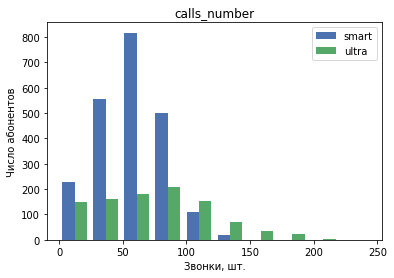

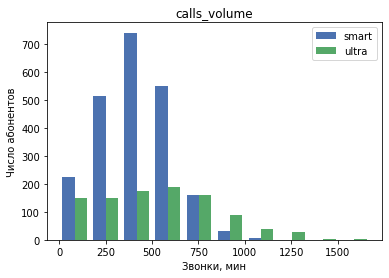

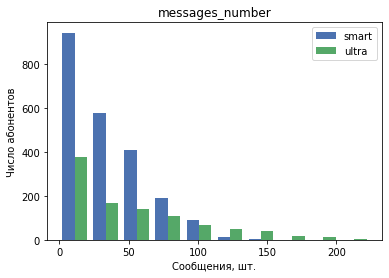

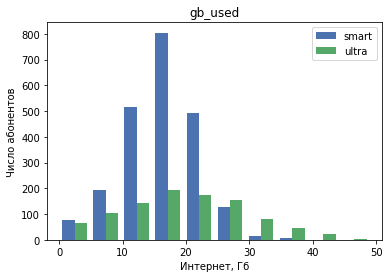

In [288]:
plt.style.use('seaborn-deep')
for i in columns:
    plt.hist([smart[i], ultra[i]], label=['smart', 'ultra'])
    plt.legend(loc='upper right')
    plt.title(i)
    if i == 'calls_number':
        plt.xlabel('Звонки, шт.')
    elif i == 'calls_volume':
        plt.xlabel('Звонки, мин')
    elif i == 'messages_number':
        plt.xlabel('Сообщения, шт.')
    else:
        plt.xlabel('Интернет, Гб')
    plt.ylabel('Число абонентов')
    plt.show()

### Вывод

Из изученных данных можно сделать следующие выводы:
1. Число звонков в месяц:
 1. Среднее число звонков на тарифах Smart и Ultra составляет 58 и 73 соотвественно.
 2. Абоненты тарифа Ultra звонят чаще абонентов тарифа Smart. Есть абоненты Ultra которые звонят и по 200 раз в месяц.
***
2. Объем минут в месяц:
 1. Средний объем использованных минут на тарифах Smart и Ultra составляет 417 и 526 минут соотвественно.
 2. Абоненты Smart в среднем не выговаривают, включенные в пакет услуг 500 минут.
 3. Абоненты Ultra говорят в среднем практически столько же сколько абоненты Smart. Включенные в пакет 3000 минут используются только на 17%.
***
3. Объем сообщений в месяц:
 1. Средний объем отправленных сообщений на тарифах Smart и Ultra составляет 33 и 49 штук соотвественно.
 2. Абоненты тарифов Smart и Ultra практически не пользуются смс. 1000 сообщений включены в тариф Ultra для галочки.
***
4. Объем трафика Интернет в месяц:
 1. Средний объем использованного трафика Интернет на тарифах Smart и Ultra составляет 16 и 19 ГБ соотвественно.
 2. Абоненты тарифа Smart используют в среднем больше ГБ, чем включено в пакете (15 ГБ) и соотвественно докупают его.
 3. Абоненты тарифа Ultra используют в среднем только 63% ГБ, включенных в их пакет.
 ***
 В целом потребление у абонентов тарифа Ultra выше, особенно в части использованных минут для разговора. Данные на тарифе Ultra имеют более высокую дисперсию и стандартное отклонение, чем на тарифе Smart. На тарифе Smart данные близки к нормальному распределению, кроме данных о числе сообщений, которые стремятся к 0.

## Проверка гипотез

Проверим следующие гипотезы:
1. Средняя выручка пользователей тарифов Ultra и Smart различается.

In [289]:
# Проверим утверждение, что среднияя выручка тарифов Ультра и Смарт отличаются. 
# Нулевая гипотеза: средние выручки равны.
# Альтернативная гипотеза: они не равны.
smart_stat = smart['revenue']
ultra_stat = ultra['revenue']

alpha = .05 # Установим стандартное значение критического уровня статистической значимости

results1 = st.ttest_ind(smart_stat, ultra_stat, equal_var = False) # мы точно знаем, что дисперсии тарифов отличаются.

print('p-значение: ', results1.pvalue)

if results1.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  1.927011394420941e-250
Отвергаем нулевую гипотезу


In [290]:
display(smart['revenue'].describe())
ultra['revenue'].describe()

count   2,230.00
mean    1,289.64
std       818.37
min       550.00
25%       550.00
50%     1,021.00
75%     1,750.00
max     6,770.00
Name: revenue, dtype: float64

count     986.00
mean    2,070.03
std       376.02
min     1,950.00
25%     1,950.00
50%     1,950.00
75%     1,950.00
max     4,800.00
Name: revenue, dtype: float64

In [291]:
print('Средняя выручка тарифа Smart:', int(smart['revenue'].count() * smart['revenue'].mean()),'руб.')
print('Средняя выручка тарифа Ultra:', int(ultra['revenue'].count() * ultra['revenue'].mean()),'руб.')

Средняя выручка тарифа Smart: 2875901 руб.
Средняя выручка тарифа Ultra: 2041050 руб.


**Вывод**: средняя выручка пользователей тарифов Ultra и Smart различается. Выручка от тарифа Smart выше за счет большего числа абонентов, которые также расходуют дополнительные пакеты на звонки и интернет.

2. Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

In [292]:
# Выделим данные по городам:
moscow = main_pivot.query('city == "Москва"')
other_cities = main_pivot.query('city != "Москва"')

# Проверим утверждение, что среднияя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.
# Нулевая гипотеза: средние выручки равны.
# Альтернативная гипотеза: они не равны.
moscow_stat = moscow['revenue']
other_stat = other_cities['revenue']

alpha = .05 # Установим стандартное значение критического уровня статистической значимости

results2 = st.ttest_ind(moscow_stat, other_stat) # Отличаются ли дисперсии мы не знаем.

print('p-значение: ', results2.pvalue)

if results2.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.5400751614511182
Не получилось отвергнуть нулевую гипотезу


**Вывод**: средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов.

### Вывод

По результатам тестов можно сделать следующие выводы:
* тарифов Smart приносит больший доход компании.
* средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов.

## Общий вывод

Компании выгоднее продвигать тариф Smart, так как абоненты на данном тарифе активно используют предоставленные им пакеты минут и данных, потребляют дополнительные пакеты, что увеличивает ARPU на абонента. Кроме того, за счет более высокого ценника на тариф Ultra, который является по сути премиальным тарифом, число привлеченных абонентов на тариф Smart может быть гораздо выше. Нет никаого смысла активно продвигать тариф Ultra.